#### Libraries

In [18]:
import pandas as pd
import os
import json
import numpy as np
import seaborn as sns

#### Setup config

In [19]:
ROOT_DIR = "../"

# Where the datasets are
DATA_PATH = os.path.join(ROOT_DIR, "data")
os.makedirs(DATA_PATH, exist_ok=True)

#### Dataframe settings

In [20]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [21]:
col_r1 = ['path',
          'qualifier',
          'reliability_rating',
          'complexity',
          'functions',
          'security_rating',
          'comment_lines_density',
          'sqale_rating',
          'comment_lines',
          'ncloc',
          'files',
          'open_issues',
          'bugs',
          'test_success_density',
          'vulnerabilities',
          'duplicated_lines_density']

col_r2 = ['path',
          'qualifier',
          'reliability_rating',
          'complexity',
          'functions',
          'security_rating',
          'comment_lines_density',
          'sqale_rating',
          'comment_lines',
          'ncloc',
          'files',
          'open_issues',
          'bugs',
          'test_success_density',
          'vulnerabilities',
          'duplicated_lines_density',
          'coverage']

## R1

#### Back-end

In [22]:
back_r1 = json.load(open('../data/back_r1.json'))

In [23]:
back_r1_base_component = pd.DataFrame(back_r1['baseComponent']['measures'])

In [24]:
back_r1_base_component

,metric,value,bestValue
0,complexity,41,NaN
1,duplicated_lines_density,0.0,True
2,functions,35,NaN
3,sqale_rating,1.0,True
4,bugs,0,True
5,ncloc,563,NaN
6,reliability_rating,1.0,True
7,security_rating,1.0,True
8,comment_lines_density,2.8,False
9,comment_lines,16,NaN


In [25]:
back_r1_path = []
back_r1_qualifier = []
back_r1_reliability_rating = []
back_r1_complexity = []
back_r1_functions = []
back_r1_security_rating = []
back_r1_comment_lines_density = []
back_r1_sqale_rating = []
back_r1_comment_lines = []
back_r1_ncloc = []
back_r1_files = []
back_r1_open_issues = []
back_r1_bugs = []
back_r1_test_success_density = []
back_r1_vulnerabilities = []
back_r1_duplicated_lines_density = []



for i in range(len(back_r1['components'])):
    back_r1_path.append(back_r1['components'][i]['path'])
    back_r1_qualifier.append(back_r1['components'][i]['qualifier'])
    for j in range(len(back_r1['components'][i]['measures'])-1):
        if back_r1['components'][i]['measures'][j]['metric'] == 'reliability_rating':
            back_r1_reliability_rating.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'complexity':
            back_r1_complexity.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'functions':
            back_r1_functions.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'security_rating':
            back_r1_security_rating.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'comment_lines_density':
            back_r1_comment_lines_density.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'sqale_rating':
            back_r1_sqale_rating.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'comment_lines':
            back_r1_comment_lines.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'ncloc':
            back_r1_ncloc.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'files':
            back_r1_files.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'open_issues':
            back_r1_open_issues.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'bugs':
            back_r1_bugs.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'test_success_density':
            back_r1_test_success_density.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'vulnerabilities':
            back_r1_vulnerabilities.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'duplicated_lines_density':
            back_r1_duplicated_lines_density.append(back_r1['components'][i]['measures'][j]['value'])
        
back_r1_df = [back_r1_path,
              back_r1_qualifier,
              back_r1_reliability_rating,
              back_r1_complexity,
              back_r1_functions,
              back_r1_security_rating,
              back_r1_comment_lines_density,
              back_r1_sqale_rating,
              back_r1_comment_lines,
              back_r1_ncloc,
              back_r1_files,
              back_r1_open_issues,
              back_r1_bugs,
              back_r1_test_success_density,
              back_r1_vulnerabilities,
              back_r1_duplicated_lines_density]

In [26]:
back_r1_df = pd.DataFrame(back_r1_df).T
back_r1_df.columns = col_r1
back_r1_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density
0,packages/benefits/src/models/benefit.js,FIL,1.0,0,0,1.0,0.0,1.0,0,34,1,0,0,100.0,0,0.0
1,packages/benefits/src/controller/BenefitContro...,FIL,1.0,7,7,1.0,1.4,1.0,1,69,1,0,0,100.0,0,0.0
2,packages/benefits/src,DIR,1.0,7,7,1.0,0.9,1.0,1,113,3,0,0,100.0,0,0.0
3,packages/resolution/src/models/category.js,FIL,1.0,0,0,1.0,0.0,1.0,0,21,1,0,0,100.0,0,0.0
4,packages/benefits/src/config,DIR,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,0.0
5,packages/resolution/src/config,DIR,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,0.0
6,packages/benefits/src/controller,DIR,1.0,7,7,1.0,1.4,1.0,1,69,1,0,0,100.0,0,0.0
7,packages/resolution/src/controller,DIR,1.0,11,7,1.0,2.7,1.0,2,72,2,0,0,100.0,0,0.0
8,packages/resolution/src/test/controller/Contro...,FIL,1.0,14,12,1.0,2.2,1.0,2,90,1,0,0,100.0,0,0.0
9,packages/benefits/src/config/database.js,FIL,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,0.0


In [27]:
back_r1_df = back_r1_df[back_r1_df['qualifier'] == 'FIL'].reset_index(drop=True)
back_r1_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density
0,packages/benefits/src/models/benefit.js,FIL,1.0,0,0,1.0,0.0,1.0,0,34,1,0,0,100.0,0,0.0
1,packages/benefits/src/controller/BenefitContro...,FIL,1.0,7,7,1.0,1.4,1.0,1,69,1,0,0,100.0,0,0.0
2,packages/resolution/src/models/category.js,FIL,1.0,0,0,1.0,0.0,1.0,0,21,1,0,0,100.0,0,0.0
3,packages/resolution/src/test/controller/Contro...,FIL,1.0,14,12,1.0,2.2,1.0,2,90,1,0,0,100.0,0,0.0
4,packages/benefits/src/config/database.js,FIL,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,0.0
5,packages/resolution/src/config/database.js,FIL,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,0.0
6,packages/user/index.js,FIL,1.0,1,1,1.0,0.0,1.0,0,11,1,1,0,100.0,0,None
7,packages/resolution/src/test/controller/ModelT...,FIL,1.0,7,7,1.0,0.0,1.0,0,40,1,None,0,None,0,None
8,packages/resolution/src/models/place.js,FIL,1.0,0,0,1.0,0.0,1.0,0,24,1,None,0,None,0,None
9,packages/resolution/src/models/post.js,FIL,1.0,1,1,1.0,11.7,1.0,11,83,1,None,0,None,0,None


In [28]:
# print('Media: ' + back_r1_df['complexity'].astype(int).mean())
# print('Mediana: ' + back_r1_df['complexity'].astype(int).median())
# print('Max: ' + back_r1_df['complexity'].astype(int).max())
# print('Min: ' + back_r1_df['complexity'].astype(int).min())
# print('Moda: ' + back_f1_df['complexity'].astype(int).mode())
# print('Std: ' + back_r1_df['complexity'].astype(int).std())
# print('Variancia' + back_r1_df['complexity'].astype(int).var())

# Criar o dataframe

In [38]:
df_medidas = pd.DataFrame(columns=['media','mediana','max','min','moda','std','variancia'])
df_medidas

,media,mediana,max,min,moda,std,variancia


<AxesSubplot:>

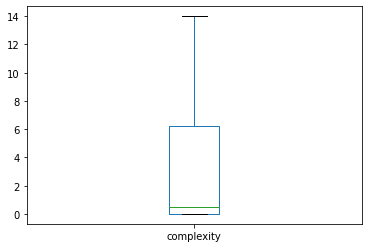

In [29]:
back_r1_df['complexity'].astype(int).plot.box()

### Função de Interpretação e Normalização (fórmulas)

##### ma1

In [30]:
median_complexity = np.median(back_r1_df['complexity'].astype(float))
median_complexity

0.5

In [31]:
complexity = back_r1_df[['complexity', 'functions']][(back_r1_df['complexity'].astype(float) <= 5) & (back_r1_df['functions'].astype(float) > 0) ]
complexity

,complexity,functions
6,1,1
9,1,1
11,4,4


In [32]:
fi1 = 0

x = np.array([0, 5])
y = np.array([1, 0])

for i in range(len(complexity)):
    fi1 += (np.interp(float(complexity['complexity'].iloc[i])/float(complexity['functions'].iloc[i]), x, y))

ma1_b1 = fi1/float(len(back_r1_df['complexity']))

ma1_b1

0.17142857142857146

##### ma2

In [33]:
# m4 = 2.8

ma2_b1 = 0 

ma2_b1

0

##### ma3

In [34]:
# m5 = 0.0
x = np.array([0, .25])
y = np.array([1, 0])

ma3_f1 = np.interp((float(front_r1_base_component['value'].iloc[1]))/100, x, y)

ma3_b1

NameError: name 'front_r1_base_component' is not defined

##### ma4

In [ ]:
# m6 = 0

ma4_b1 = 0 

ma4_b1

##### ma5

In [ ]:
# m7 = 1

ma5_b1 = 0 

ma5_b1

##### ma6

In [ ]:
#m8 = 0

ma6_b1 = 0

ma6_b1

##### ma7

In [ ]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma7_b1 = np.interp((float(back_r1_base_component['value'].iloc[4])), x, y)/float(back_r1_base_component['value'].iloc[12])
ma7_b1

##### ma8

In [ ]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma8_b1 = np.interp((float(back_r1_base_component['value'].iloc[10])), x, y)/float(back_r1_base_component['value'].iloc[12])
ma8_b1

##### ma9

In [ ]:
m14 = m15 = 8 # total de histórias de usuário // aceitas

x = np.array([0.25, 0.1])
y = np.array([1, 0])

ma9_b1 = np.interp(float(m15), x, y)/m14

ma9_b1

##### ma10

In [ ]:
TOTAL_CRIT_ACEIT_BACK_R1 = 13
TOTAL_CRIT_ACEIT_ATEND_BACK_R1 = 9
m16 = TOTAL_CRIT_ACEIT_BACK_R1 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA
m17 = TOTAL_CRIT_ACEIT_ATEND_BACK_R1 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA ATENDIDAS

x = np.array([0.5, 1])
y = np.array([1, 0])

ma10_b1 = np.interp((m17/m16), x, y)/m14

ma10_b1

### Ponderação e Agregação na SubCaracterística

##### asc1

In [ ]:
psc1 = 0.33
pma1 = 0.33
pma2 = 0.33
pma3 = 0.33

asc1_b1 = ((ma1_b1*pma1)+(ma2_b1*pma2)+(ma3_b1*pma3))*psc1
asc1_b1 #Modificabilidade

##### asc2

In [ ]:
psc2 = 0.33
pma4 = 1

asc2_b1 = (ma4_b1*pma4)*psc2
asc2_b1 #Testabilidade

##### asc3

In [ ]:
ps3 = 0.33
pma5 = 1

asc3_b1 = (ma5_b1*pma5)*ps3
asc3_b1 #Dívida Técnica(Sqale)

##### asc4

In [ ]:
psc4 = 1
pma6 = 0.5
pma7 = 0.5

asc4_b1 = ((ma6_b1*pma6) + (ma7_b1*pma7)) * psc4

asc4_b1 #Maturidade

##### asc5

In [ ]:
psc5 = 1
pma8 = 1

asc5_b1 = ((ma8_b1*pma8)) * psc5

asc5_b1 #Integridade

##### asc6

In [ ]:
psc6 = 0.5
pma9 = 1

asc6_b1 = ((ma9_b1*pma9)) * psc6

asc6_b1 #Completude Funcional

##### asc7

In [ ]:
psc7 = 0.5
pma10 = 1

asc7_b1 = ((ma10_b1*pma10)) * psc7

asc7_b1 #Corretude Funcional

### Ponderação e Agregação na Característica

##### ac1

In [ ]:
pc1 = 0.2

ac1_b1 = (asc1_b1 + asc2_b1 + asc3_b1)*pc1
ac1_b1 #Manutenibilidade

##### ac2

In [ ]:
pc2 = 0.2

ac2_b1 = asc4_b1 * pc2

ac2_b1 #Confiabilidade

##### ac3

In [ ]:
pc3 = 0.2

ac3_b1 = asc5_b1 * pc3

ac3_b1 #Segurança

##### ac4

In [ ]:
pc4 = 0.4

ac4_b1 = (asc6_b1 + asc6_b1) * pc4

ac4_b1 #Segurança

#### Front-end

In [ ]:
front_r1 = json.load(open('../data/front_r1.json'))

In [ ]:
front_r1_base_component = pd.DataFrame(front_r1['baseComponent']['measures'])

In [ ]:
front_r1_base_component

In [ ]:
front_r1_path = []
front_r1_qualifier = []
front_r1_reliability_rating = []
front_r1_complexity = []
front_r1_functions = []
front_r1_security_rating = []
front_r1_comment_lines_density = []
front_r1_sqale_rating = []
front_r1_comment_lines = []
front_r1_ncloc = []
front_r1_files = []
front_r1_open_issues = []
front_r1_bugs = []
front_r1_test_success_density = []
front_r1_vulnerabilities = []
front_r1_duplicated_lines_density = []



for i in range(len(front_r1['components'])):
    front_r1_path.append(front_r1['components'][i]['path'])
    front_r1_qualifier.append(front_r1['components'][i]['qualifier'])
    for j in range(len(front_r1['components'][i]['measures'])-1):
        if front_r1['components'][i]['measures'][j]['metric'] == 'reliability_rating':
            front_r1_reliability_rating.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'complexity':
            front_r1_complexity.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'functions':
            front_r1_functions.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'security_rating':
            front_r1_security_rating.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'comment_lines_density':
            front_r1_comment_lines_density.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'sqale_rating':
            front_r1_sqale_rating.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'comment_lines':
            front_r1_comment_lines.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'ncloc':
            front_r1_ncloc.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'files':
            front_r1_files.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'open_issues':
            front_r1_open_issues.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'bugs':
            front_r1_bugs.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'test_success_density':
            front_r1_test_success_density.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'vulnerabilities':
            front_r1_vulnerabilities.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'duplicated_lines_density':
            front_r1_duplicated_lines_density.append(front_r1['components'][i]['measures'][j]['value'])
        
front_r1_df = [front_r1_path,
              front_r1_qualifier,
              front_r1_reliability_rating,
              front_r1_complexity,
              front_r1_functions,
              front_r1_security_rating,
              front_r1_comment_lines_density,
              front_r1_sqale_rating,
              front_r1_comment_lines,
              front_r1_ncloc,
              front_r1_files,
              front_r1_open_issues,
              front_r1_bugs,
              front_r1_test_success_density,
              front_r1_vulnerabilities,
              front_r1_duplicated_lines_density]

In [ ]:
front_r1_df = pd.DataFrame(front_r1_df).T
front_r1_df.columns = col_r1
front_r1_df

In [ ]:
front_r1_df = front_r1_df[front_r1_df['qualifier'] == 'FIL'].reset_index(drop=True)
front_r1_df

### Função de Interpretação e Normalização (fórmulas)

##### ma1

In [ ]:
complexity_notnull = front_r1_df['complexity'][pd.notnull(front_r1_df['complexity'])]
median_complexity = np.median(complexity_notnull.astype(float))
median_complexity

In [ ]:
complexity = front_r1_df[['complexity', 'functions']][(front_r1_df['complexity'].astype(float) <= median_complexity) & (front_r1_df['functions'].astype(float) > 0) ]
complexity

In [ ]:
fi1 = 0

x = np.array([0, median_complexity])
y = np.array([1, 0])

for i in range(len(complexity)):
    fi1 += (np.interp(float(complexity['complexity'].iloc[i])/float(complexity['functions'].iloc[i]), x, y))

ma1_f1 = fi1/float(len(front_r1_df['complexity']))

ma1_f1

##### ma2

In [ ]:
# m4 = 3.6

ma2_f1 = 0 

ma2_f1

##### ma3

In [ ]:
# m5 = 0.0

ma3_f1 = 0 

ma3_f1

##### ma4

In [ ]:
# m6 = 0

ma4_f1 = 0 

ma4_f1

##### ma5

In [ ]:
# m7 = 1

ma5_f1 = 0 

ma5_f1

##### ma6

In [ ]:
#m8 = 0

ma6_f1 = 0

ma6_f1

##### ma7

In [ ]:
x = np.array([0.0, 0.1])
y = np.array([1, 0])

ma7_f1 = np.interp((float(front_r1_base_component['value'].iloc[4])), x, y)/float(front_r1_base_component['value'].iloc[12])
ma7_f1

##### ma8

In [ ]:
x = np.array([0.0, 0.15])
y = np.array([1, 0])

ma8_f1 = np.interp((float(front_r1_base_component['value'].iloc[10])), x, y)/float(front_r1_base_component['value'].iloc[12])
ma8_f1

##### ma9

In [ ]:
m14 = m15 = 8 # total de histórias de usuário // aceitas

x = np.array([0.25, 0.1])
y = np.array([1, 0])

ma9_f1 = np.interp(float(m15), x, y)/m14

ma9_f1

##### ma10

In [ ]:
TOTAL_CRIT_ACEIT_FRONT_R1 = 13
TOTAL_CRIT_ACEIT_ATEND_FRONT_R1 = 9
m16 = TOTAL_CRIT_ACEIT_FRONT_R1 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA
m17 = TOTAL_CRIT_ACEIT_ATEND_FRONT_R1 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA ATENDIDAS

x = np.array([0.5, 1])
y = np.array([1, 0])

ma10_f1 = np.interp((m17/m16), x, y)/m14

ma10_f1

### Ponderação e Agregação na SubCaracterística

##### asc1

In [ ]:
psc1 = 0.33
pma1 = 0.33
pma2 = 0.33
pma3 = 0.33

asc1_f1 = ((ma1_f1*pma1)+(ma2_f1*pma2)+(ma3_f1*pma3))*psc1
asc1_f1 #Modificabilidade

##### asc2

In [ ]:
psc2 = 0.33
pma4 = 1

asc2_f1 = (ma4_f1*pma4)*psc2
asc2_f1 #Testabilidade

##### asc3

In [ ]:
ps3 = 0.33
pma5 = 1

asc3_f1 = (ma5_f1*pma5)*ps3
asc3_f1 #Dívida Técnica(Sqale)

##### asc4

In [ ]:
psc4 = 1
pma6 = 0.5
pma7 = 0.5

asc4_f1 = ((ma6_f1*pma6) + (ma7_f1*pma7)) * psc4

asc4_f1 #Maturidade

##### asc5

In [ ]:
psc5 = 1
pma8 = 1

asc5_f1 = ((ma8_f1*pma8)) * psc5

asc5_f1 #Integridade

##### asc6

In [ ]:
psc6 = 0.5
pma9 = 1

asc6_f1 = ((ma9_f1*pma9)) * psc6

asc6_f1 #Completude Funcional

##### asc7

In [ ]:
psc7 = 0.5
pma10 = 1

asc7_f1 = ((ma10_f1*pma10)) * psc7

asc7_f1 #Corretude Funcional

### Ponderação e Agregação na Característica

##### ac1

In [ ]:
pc1 = 0.2

ac1_f1 = (asc1_f1 + asc2_f1 + asc3_f1)*pc1
ac1_f1 #Manutenibilidade

##### ac2

In [ ]:
pc2 = 0.2

ac2_f1 = asc4_f1 * pc2

ac2_f1 #Confiabilidade

##### ac3

In [ ]:
pc3 = 0.2

ac3_f1 = asc5_f1 * pc3

ac3_f1 #Segurança

##### ac4

In [ ]:
pc4 = 0.4

ac4_f1 = (asc6_f1 + asc6_f1) * pc4

ac4_f1 #Segurança

## R2

#### Back-end

In [ ]:
back_r2 = json.load(open('../data/back_r2.json'))

In [ ]:
back_r2_base_component = pd.DataFrame(back_r2['baseComponent']['measures'])

In [ ]:
back_r2_base_component

In [ ]:
back_r2_path = []
back_r2_qualifier = []
back_r2_reliability_rating = []
back_r2_complexity = []
back_r2_functions = []
back_r2_security_rating = []
back_r2_comment_lines_density = []
back_r2_sqale_rating = []
back_r2_comment_lines = []
back_r2_ncloc = []
back_r2_files = []
back_r2_open_issues = []
back_r2_bugs = []
back_r2_test_success_density = []
back_r2_vulnerabilities = []
back_r2_duplicated_lines_density = []
back_r2_coverage = []



for i in range(len(back_r2['components'])):
    back_r2_path.append(back_r2['components'][i]['path'])
    back_r2_qualifier.append(back_r2['components'][i]['qualifier'])
    for j in range(len(back_r2['components'][i]['measures'])-1):
        if back_r2['components'][i]['measures'][j]['metric'] == 'reliability_rating':
            back_r2_reliability_rating.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'complexity':
            back_r2_complexity.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'functions':
            back_r2_functions.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'security_rating':
            back_r2_security_rating.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'comment_lines_density':
            back_r2_comment_lines_density.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'sqale_rating':
            back_r2_sqale_rating.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'comment_lines':
            back_r2_comment_lines.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'ncloc':
            back_r2_ncloc.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'files':
            back_r2_files.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'open_issues':
            back_r2_open_issues.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'bugs':
            back_r2_bugs.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'test_success_density':
            back_r2_test_success_density.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'vulnerabilities':
            back_r2_vulnerabilities.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'duplicated_lines_density':
            back_r2_duplicated_lines_density.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'coverage':
            back_r2_coverage.append(back_r2['components'][i]['measures'][j]['value'])
        
back_r2_df = [back_r2_path,
              back_r2_qualifier,
              back_r2_reliability_rating,
              back_r2_complexity,
              back_r2_functions,
              back_r2_security_rating,
              back_r2_comment_lines_density,
              back_r2_sqale_rating,
              back_r2_comment_lines,
              back_r2_ncloc,
              back_r2_files,
              back_r2_open_issues,
              back_r2_bugs,
              back_r2_test_success_density,
              back_r2_vulnerabilities,
              back_r2_duplicated_lines_density,
              back_r2_coverage]

In [ ]:
back_r2_df = pd.DataFrame(back_r2_df).T
back_r2_df.columns = col_r2
back_r2_df

In [ ]:
back_r2_df = back_r2_df[back_r2_df['qualifier'] == 'FIL'].reset_index(drop=True)
back_r2_df

### Função de Interpretação e Normalização (fórmulas)

##### ma1

In [ ]:
complexity_notnull = back_r2_df['complexity'][pd.notnull(back_r2_df['complexity'])]
median_complexity = np.median(complexity_notnull.astype(float))
median_complexity

In [ ]:
complexity = back_r2_df[['complexity', 'functions']][(back_r2_df['complexity'].astype(float) <= median_complexity) & (back_r2_df['functions'].astype(float) > 0) ]
complexity


In [ ]:
fi1 = 0

x = np.array([0, median_complexity])
y = np.array([1, 0])

for i in range(len(complexity)):
    fi1 += (np.interp(float(complexity['complexity'].iloc[i])/float(complexity['functions'].iloc[i]), x, y))

ma1_b2 = fi1/float(len(back_r2_df['complexity']))

ma1_b2

##### ma2

In [ ]:
# m4 = 2.4

ma2_b2 = 0 

ma2_b2

##### ma3

In [ ]:
x = np.array([0.1, 0.2])
y = np.array([1, 0])

# m5 = 13
ma3_b2 = np.interp((float(back_r2_base_component['value'].iloc[0]))/100, x, y)

ma3_b2

##### ma4

In [ ]:
coverage_df = back_r2_df[back_r2_df['coverage'].astype(float) > 90]

In [ ]:
fi4 = 0

for i in range(len(coverage_df)):
    fi4 += (np.interp(float(coverage_df['coverage'].iloc[i])/100, x, y))

In [ ]:
x = np.array([0, 0.9])
y = np.array([1, 0])

# m6 = 91.7

ma4_b2 = fi4/float(len(back_r2_df['complexity']))

ma4_b2

##### ma5

In [ ]:
# m7 = 1

ma5_b2 = 0

ma5_b2

##### ma6

In [ ]:
#m8 = 100

ma6_b2 = 0

ma6_b2

##### ma7

In [ ]:
x = np.array([0.0, 0.1])
y = np.array([1, 0])

ma7_b2 = np.interp((float(back_r2_base_component['value'].iloc[7])), x, y)/float(back_r2_base_component['value'].iloc[13])
ma7_b2

##### ma8

In [ ]:
x = np.array([0.0, 0.15])
y = np.array([1, 0])

ma8_b2 = np.interp((float(back_r2_base_component['value'].iloc[12])), x, y)/float(back_r2_base_component['value'].iloc[13])
ma8_b2

##### ma9

In [ ]:
m14 = m15 = 15 # total de histórias de usuário // aceitas

x = np.array([0.25, 0.1])
y = np.array([1, 0])

ma9_b2 = np.interp(float(m15), x, y)/m14

ma9_b2

##### ma10

In [ ]:
TOTAL_CRIT_ACEIT_BACK_R2 = 27
TOTAL_CRIT_ACEIT_ATEND_BACK_R2 = 19

m16 = TOTAL_CRIT_ACEIT_BACK_R2 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA
m17 = TOTAL_CRIT_ACEIT_ATEND_BACK_R2 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA ATENDIDAS

x = np.array([0.5, 1])
y = np.array([1, 0])

ma10_b2 = np.interp((m17/m16), x, y)/m14

ma10_b2

### Ponderação e Agregação na SubCaracterística

##### asc1

In [ ]:
psc1 = 0.33
pma1 = 0.33
pma2 = 0.33
pma3 = 0.33

asc1_b2 = ((ma1_b2*pma1)+(ma2_b2*pma2)+(ma3_b2*pma3))*psc1
asc1_b2 #Modificabilidade

##### asc2

In [ ]:
psc2 = 0.33
pma4 = 1

asc2_b2 = (ma4_b2*pma4)*psc2
asc2_b2 #Testabilidade

##### asc3

In [ ]:
ps3 = 0.33
pma5 = 1

asc3_b2 = (ma5_b2*pma5)*ps3
asc3_b2 #Dívida Técnica(Sqale)

##### asc4

In [ ]:
psc4 = 1
pma6 = 0.5
pma7 = 0.5

asc4_b2 = ((ma6_b2*pma6) + (ma7_b2*pma7)) * psc4

asc4_b2 #Maturidade

##### asc5

In [ ]:
psc5 = 1
pma8 = 1

asc5_b2 = ((ma8_b2*pma8)) * psc5

asc5_b2 #Integridade

##### asc6

In [ ]:
psc6 = 0.5
pma9 = 1

asc6_b2 = ((ma9_b2*pma9)) * psc6

asc6_b2 #Completude Funcional

##### asc7

In [ ]:
psc7 = 0.5
pma10 = 1

asc7_b2 = ((ma10_b2*pma10)) * psc7

asc7_b2 #Corretude Funcional

### Ponderação e Agregação na Característica

##### ac1

In [ ]:
pc1 = 0.2

ac1_b2 = (asc1_b2 + asc2_b2 + asc3_b2)*pc1
ac1_b2 #Manutenibilidade

##### ac2

In [ ]:
pc2 = 0.2

ac2_b2 = asc4_b2 * pc2

ac2_b2 #Confiabilidade

##### ac3

In [ ]:
pc3 = 0.2

ac3_b2 = asc5_b2 * pc3

ac3_b2 #Segurança

##### ac4

In [ ]:
pc4 = 0.4

ac4_b2 = (asc6_b2 + asc6_b2) * pc4

ac4_b2 #Segurança

#### Front-end

In [ ]:
front_r2 = json.load(open('../data/front_r2.json'))

In [ ]:
front_r2_base_component = pd.DataFrame(front_r2['baseComponent']['measures'])

In [ ]:
front_r2_base_component

In [ ]:
front_r2_path = []
front_r2_qualifier = []
front_r2_reliability_rating = []
front_r2_complexity = []
front_r2_functions = []
front_r2_security_rating = []
front_r2_comment_lines_density = []
front_r2_sqale_rating = []
front_r2_comment_lines = []
front_r2_ncloc = []
front_r2_files = []
front_r2_open_issues = []
front_r2_bugs = []
front_r2_test_success_density = []
front_r2_vulnerabilities = []
front_r2_duplicated_lines_density = []
front_r2_coverage = []



for i in range(len(front_r2['components'])):
    front_r2_path.append(front_r2['components'][i]['path'])
    front_r2_qualifier.append(front_r2['components'][i]['qualifier'])
    for j in range(len(front_r2['components'][i]['measures'])-1):
        if front_r2['components'][i]['measures'][j]['metric'] == 'reliability_rating':
            front_r2_reliability_rating.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'complexity':
            front_r2_complexity.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'functions':
            front_r2_functions.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'security_rating':
            front_r2_security_rating.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'comment_lines_density':
            front_r2_comment_lines_density.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'sqale_rating':
            front_r2_sqale_rating.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'comment_lines':
            front_r2_comment_lines.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'ncloc':
            front_r2_ncloc.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'files':
            front_r2_files.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'open_issues':
            front_r2_open_issues.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'bugs':
            front_r2_bugs.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'test_success_density':
            front_r2_test_success_density.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'vulnerabilities':
            front_r2_vulnerabilities.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'duplicated_lines_density':
            front_r2_duplicated_lines_density.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'coverage':
            front_r2_coverage.append(front_r2['components'][i]['measures'][j]['value'])
        
front_r2_df = [front_r2_path,
              front_r2_qualifier,
              front_r2_reliability_rating,
              front_r2_complexity,
              front_r2_functions,
              front_r2_security_rating,
              front_r2_comment_lines_density,
              front_r2_sqale_rating,
              front_r2_comment_lines,
              front_r2_ncloc,
              front_r2_files,
              front_r2_open_issues,
              front_r2_bugs,
              front_r2_test_success_density,
              front_r2_vulnerabilities,
              front_r2_duplicated_lines_density,
              front_r2_coverage]

In [ ]:
front_r2_df = pd.DataFrame(front_r2_df).T
front_r2_df.columns = col_r2
front_r2_df

In [ ]:
front_r2_df = front_r2_df[front_r2_df['qualifier'] == 'FIL'].reset_index(drop=True)
front_r2_df

### Função de Interpretação e Normalização (fórmulas)

##### ma1

In [ ]:
complexity_notnull = front_r2_df['complexity'][pd.notnull(front_r2_df['complexity'])]
median_complexity = np.median(complexity_notnull.astype(float))
median_complexity

In [ ]:
complexity = front_r2_df[['complexity', 'functions']][(front_r2_df['complexity'].astype(float) <= median_complexity) & (front_r2_df['functions'].astype(float) > 0) ]
complexity

In [ ]:

fi1 = 0

x = np.array([0, median_complexity])
y = np.array([1, 0])

for i in range(len(complexity)):
    fi1 += (np.interp(float(complexity['complexity'].iloc[i])/float(complexity['functions'].iloc[i]), x, y))

ma1_f2 = fi1/float(len(front_r2_df['complexity']))

ma1_f2

##### ma2

In [ ]:
# m4 = 4.7

ma2_f2 = 0 

ma2_f2

##### ma3

In [ ]:
# m5 = 4.3

ma3_f2 = 0 

ma3_f2

##### ma4

In [ ]:
# m6 = 41.1

ma4_f2 = 0 

ma4_f2

##### ma5

In [ ]:
# m7 = 1

ma5_f2 = 0 

ma5_f2

##### ma6

In [ ]:
#m8 = 100

ma6_f2 = 0

ma6_f2

##### ma7

In [ ]:
x = np.array([0.0, 0.1])
y = np.array([1, 0])

# ma7_f2 = np.interp((float(front_r2_base_component['value'].iloc[4])), x, y)/float(front_r2_base_component['value'].iloc[12])

ma7_f2 = 0
ma7_f2

##### ma8

In [ ]:
x = np.array([0.0, 0.15])
y = np.array([1, 0])

#ma8_f2 = np.interp((float(front_r1_base_component['value'].iloc[10])), x, y)/float(front_r1_base_component['value'].iloc[12])

ma8_f2 = 0
ma8_f2

##### ma9

In [ ]:
m14 = m15 = 15 # total de histórias de usuário // aceitas

x = np.array([0.25, 0.1])
y = np.array([1, 0])

ma9_f2 = np.interp(float(m15), x, y)/m14

ma9_f2

##### ma10

In [ ]:
TOTAL_CRIT_ACEIT_FRONT_R2 = 27
TOTAL_CRIT_ACEIT_ATEND_FRONT_R2 = 19

m16 = TOTAL_CRIT_ACEIT_FRONT_R2 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA
m17 = TOTAL_CRIT_ACEIT_ATEND_FRONT_R2 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA ATENDIDAS

x = np.array([0.5, 1])
y = np.array([1, 0])

ma10_f2 = np.interp((m17/m16), x, y)/m14

ma10_f2

### Ponderação e Agregação na SubCaracterística

##### asc1

In [ ]:
psc1 = 0.33
pma1 = 0.33
pma2 = 0.33
pma3 = 0.33

asc1_f2 = ((ma1_f2*pma1)+(ma2_f2*pma2)+(ma3_f2*pma3))*psc1
asc1_f2 #Modificabilidade

##### asc2

In [ ]:
psc2 = 0.33
pma4 = 1

asc2_f2 = (ma4_f2*pma4)*psc2
asc2_f2 #Testabilidade

##### asc3

In [ ]:
ps3 = 0.33
pma5 = 1

asc3_f2 = (ma5_f2*pma5)*ps3
asc3_f2 #Dívida Técnica(Sqale)

##### asc4

In [ ]:
psc4 = 1
pma6 = 0.5
pma7 = 0.5

asc4_f2 = ((ma6_f2*pma6) + (ma7_f2*pma7)) * psc4

asc4_f2 #Maturidade

##### asc5

In [ ]:
psc5 = 1
pma8 = 1

asc5_f2 = ((ma8_f2*pma8)) * psc5

asc5_f2 #Integridade

##### asc6

In [ ]:
psc6 = 0.5
pma9 = 1

asc6_f2 = ((ma9_f2*pma9)) * psc6

asc6_f2 #Completude Funcional

##### asc7

In [ ]:
psc7 = 0.5
pma10 = 1

asc7_f2 = ((ma10_f2*pma10)) * psc7

asc7_f2 #Corretude Funcional

### Ponderação e Agregação na Característica

##### ac1

In [ ]:
pc1 = 0.2

ac1_f2 = (asc1_f2 + asc2_f2 + asc3_f2)*pc1
ac1_f2 #Manutenibilidade

##### ac2

In [ ]:
pc2 = 0.2

ac2_f2 = asc4_f2 * pc2

ac2_f2 #Confiabilidade

##### ac3

In [ ]:
pc3 = 0.2

ac3_f2 = asc5_f2 * pc3

ac3_f2 #Segurança

##### ac4

In [ ]:
pc4 = 0.4

ac4_f2 = (asc6_f2 + asc6_f2) * pc4

ac4_f2 #Segurança

## Result DataFrames

### ma

In [ ]:
ma_b1 = [ma1_b1,ma2_b1,ma3_b1,ma4_b1,ma5_b1,ma6_b1,ma7_b1,ma8_b1,ma9_b1,ma10_b1]
ma_f1 = [ma1_f1,ma2_f1,ma3_f1,ma4_f1,ma5_f1,ma6_f1,ma7_f1,ma8_f1,ma9_f1,ma10_f1]
ma_b2 = [ma1_b2,ma2_b2,ma3_b2,ma4_b2,ma5_b2,ma6_b2,ma7_b2,ma8_b2,ma9_b2,ma10_b2]
ma_f2 = [ma1_f2,ma2_f2,ma3_f2,ma4_f2,ma5_f2,ma6_f2,ma7_f2,ma8_f2,ma9_f2,ma10_f2]

In [ ]:
ma = pd.DataFrame([ma_b1, ma_f1, ma_b2, ma_f2]).T
ma.columns = ['ma_back_r1','ma_front_r1','ma_back_r2','ma_front_r2']

In [ ]:
ma

### asc

In [ ]:
asc_b1 = [asc1_b1,asc2_b1,asc3_b1,asc4_b1,asc5_b1,asc6_b1,asc7_b1]
asc_f1 = [asc1_f1,asc2_f1,asc3_f1,asc4_f1,asc5_f1,asc6_f1,asc7_f1]
asc_b2 = [asc1_b2,asc2_b2,asc3_b2,asc4_b2,asc5_b2,asc6_b2,asc7_b2]
asc_f2 = [asc1_f2,asc2_f2,asc3_f2,asc4_f2,asc5_f2,asc6_f2,asc7_f2]

In [ ]:
asc = pd.DataFrame([asc_b1, asc_f1, asc_b2, asc_f2]).T
asc.columns = ['asc_back_r1','asc_front_r1','asc_back_r2','asc_front_r2']

In [ ]:
asc

### ac

In [ ]:
ac_b1 = [ac1_b1,ac2_b1,ac3_b1,ac4_b1]
ac_f1 = [ac1_f1,ac2_f1,ac3_f1,ac4_f1]
ac_b2 = [ac1_b2,ac2_b2,ac3_b2,ac4_b2]
ac_f2 = [ac1_f2,ac2_f2,ac3_f2,ac4_f2]

In [ ]:
ac = pd.DataFrame([ac_b1, ac_f1, ac_b2, ac_f2]).T
ac.columns = ['ac_back_r1','ac_front_r1','ac_back_r2','ac_front_r2']

In [ ]:
ac

## Analysis